<a href="https://colab.research.google.com/github/eduhwwh/Projeto_Data_Science/blob/main/AtividadeEstat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from scipy import stats

uri = "https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv"

temp = pd.read_csv(uri)
temp.head()
df = pd.read_csv(uri)

In [ ]:
# Exercício 1.

def tabela_frequencia(df, column, num_classes=None):
    if pd.api.types.is_numeric_dtype(df[column]):
        min_value = df[column].min()
        max_value = df[column].max()

        class_width = (max_value - min_value) / num_classes
        bins = np.linspace(min_value, max_value, num_classes + 1)

        freq_abs = pd.cut(df[column], bins=bins, include_lowest=True).value_counts().sort_index()
        freq_rel = freq_abs / len(df)

        freq_acum = freq_abs.cumsum()
        freq_acum_pct = freq_rel.cumsum()

        table = pd.DataFrame({
            'classe': range(1, num_classes + 1),
            'limite_inferior': bins[:-1],
            'limite_superior': bins[1:],
            'ponto_médio': (bins[:-1] + bins[1:]) / 2,
            'frequência_absoluta': freq_abs.values,
            'frequência_relativa': freq_rel.values,
            'frequência_acumulada (valor)': freq_acum.values,
            'frequência_acumulada (%)': freq_acum_pct.values * 100
        })

        return table

    elif isinstance(df[column].dtype, pd.CategoricalDtype) or df[column].dtype == object:
        freq_abs = df[column].value_counts().sort_index()
        freq_rel = freq_abs / len(df)

        freq_acum = freq_abs.cumsum()
        freq_acum_pct = freq_rel.cumsum()

        table = pd.DataFrame({
            'categoria': freq_abs.index,
            'frequência_absoluta': freq_abs.values,
            'frequência_relativa': freq_rel.values,
            'frequência_acumulada (valor)': freq_acum.values,
            'frequência_acumulada (%)': freq_acum_pct.values * 100
        })

        return table

    else:
        print(f"O tipo de dado da coluna {column} não é suportado.")
        return None

columns_to_summarize = ['day', 'month', 'DMC', 'DC', 'ISI']
num_classes = 5

for col in columns_to_summarize:
    print(f"Tabela Resumo - {col}")
    tabela = tabela_frequencia(temp, col, num_classes)
    if tabela is not None:
        display(tabela)
    print("\n")


Tabela Resumo - day


,categoria,frequência_absoluta,frequência_relativa,frequência_acumulada (valor),frequência_acumulada (%)
0,fri,85,0.164410,85,16.441006
1,mon,74,0.143133,159,30.754352
2,sat,84,0.162476,243,47.001934
3,sun,95,0.183752,338,65.377176
4,thu,61,0.117988,399,77.176015
5,tue,64,0.123791,463,89.555126
6,wed,54,0.104449,517,100.000000




Tabela Resumo - month


,categoria,frequência_absoluta,frequência_relativa,frequência_acumulada (valor),frequência_acumulada (%)
0,apr,9,0.017408,9,1.740812
1,aug,184,0.355899,193,37.330754
2,dec,9,0.017408,202,39.071567
3,feb,20,0.038685,222,42.940039
4,jan,2,0.003868,224,43.326886
5,jul,32,0.061896,256,49.516441
6,jun,17,0.032882,273,52.804642
7,mar,54,0.104449,327,63.249516
8,may,2,0.003868,329,63.636364
9,nov,1,0.001934,330,63.829787




Tabela Resumo - DMC


,classe,limite_inferior,limite_superior,ponto_médio,frequência_absoluta,frequência_relativa,frequência_acumulada (valor),frequência_acumulada (%)
0,1,1.10,59.14,30.12,126,0.243714,126,24.371373
1,2,59.14,117.18,88.16,163,0.315280,289,55.899420
2,3,117.18,175.22,146.20,155,0.299807,444,85.880077
3,4,175.22,233.26,204.24,48,0.092843,492,95.164410
4,5,233.26,291.30,262.28,25,0.048356,517,100.000000




Tabela Resumo - DC


,classe,limite_inferior,limite_superior,ponto_médio,frequência_absoluta,frequência_relativa,frequência_acumulada (valor),frequência_acumulada (%)
0,1,7.90,178.44,93.17,88,0.170213,88,17.021277
1,2,178.44,348.98,263.71,16,0.030948,104,20.116054
2,3,348.98,519.52,434.25,47,0.090909,151,29.206963
3,4,519.52,690.06,604.79,176,0.340426,327,63.249516
4,5,690.06,860.60,775.33,190,0.367505,517,100.000000




Tabela Resumo - ISI


,classe,limite_inferior,limite_superior,ponto_médio,frequência_absoluta,frequência_relativa,frequência_acumulada (valor),frequência_acumulada (%)
0,1,0.00,11.22,5.61,395,0.764023,395,76.402321
1,2,11.22,22.44,16.83,119,0.230174,514,99.419729
2,3,22.44,33.66,28.05,2,0.003868,516,99.806576
3,4,33.66,44.88,39.27,0,0.000000,516,99.806576
4,5,44.88,56.10,50.49,1,0.001934,517,100.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

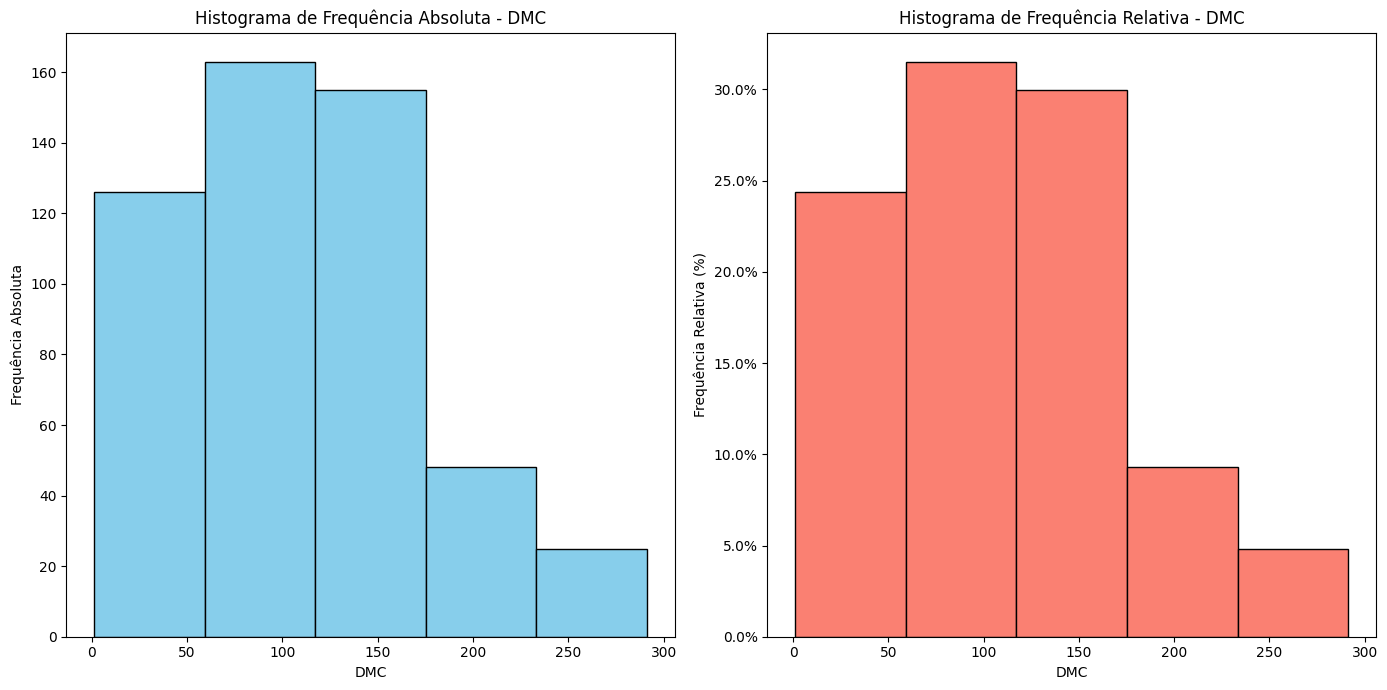

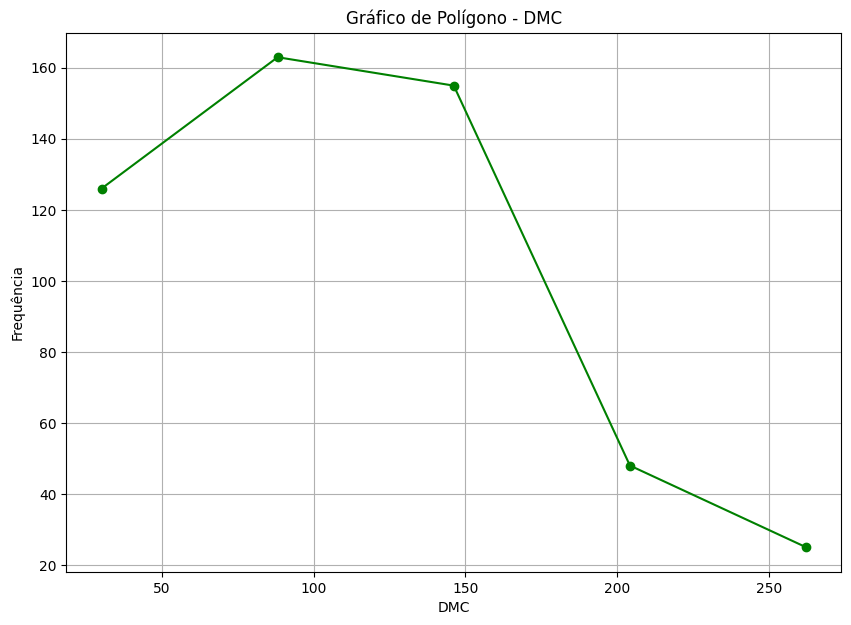

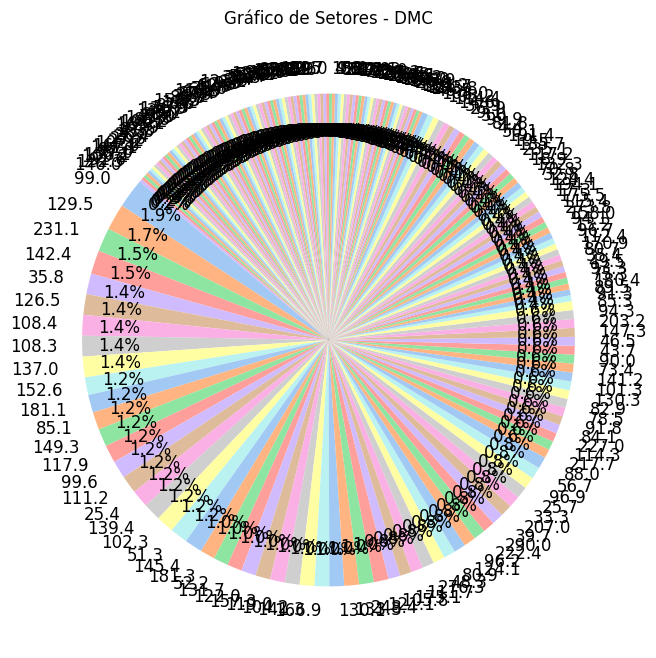

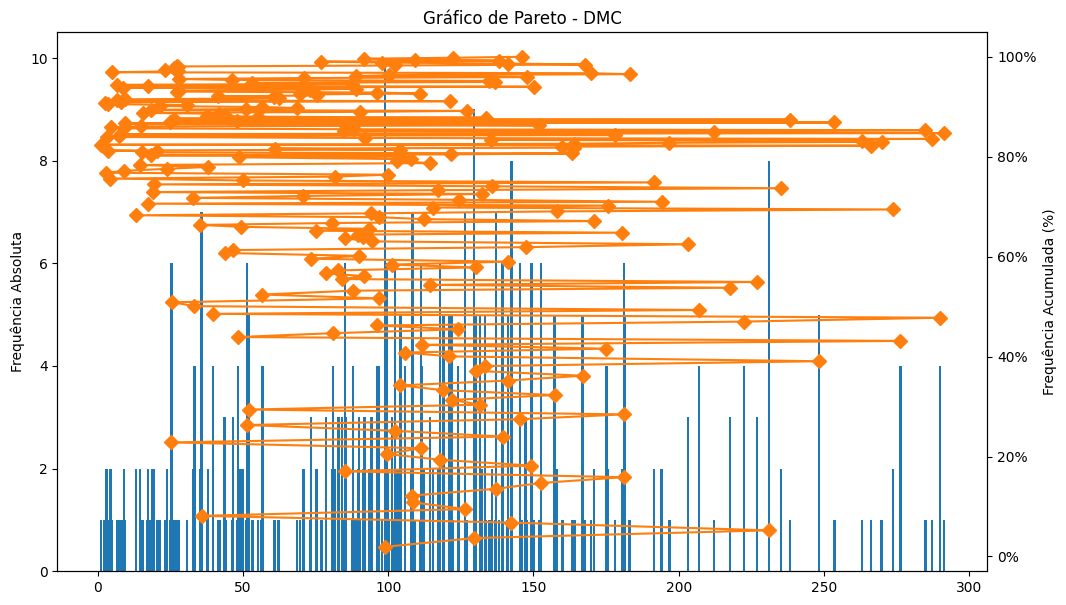

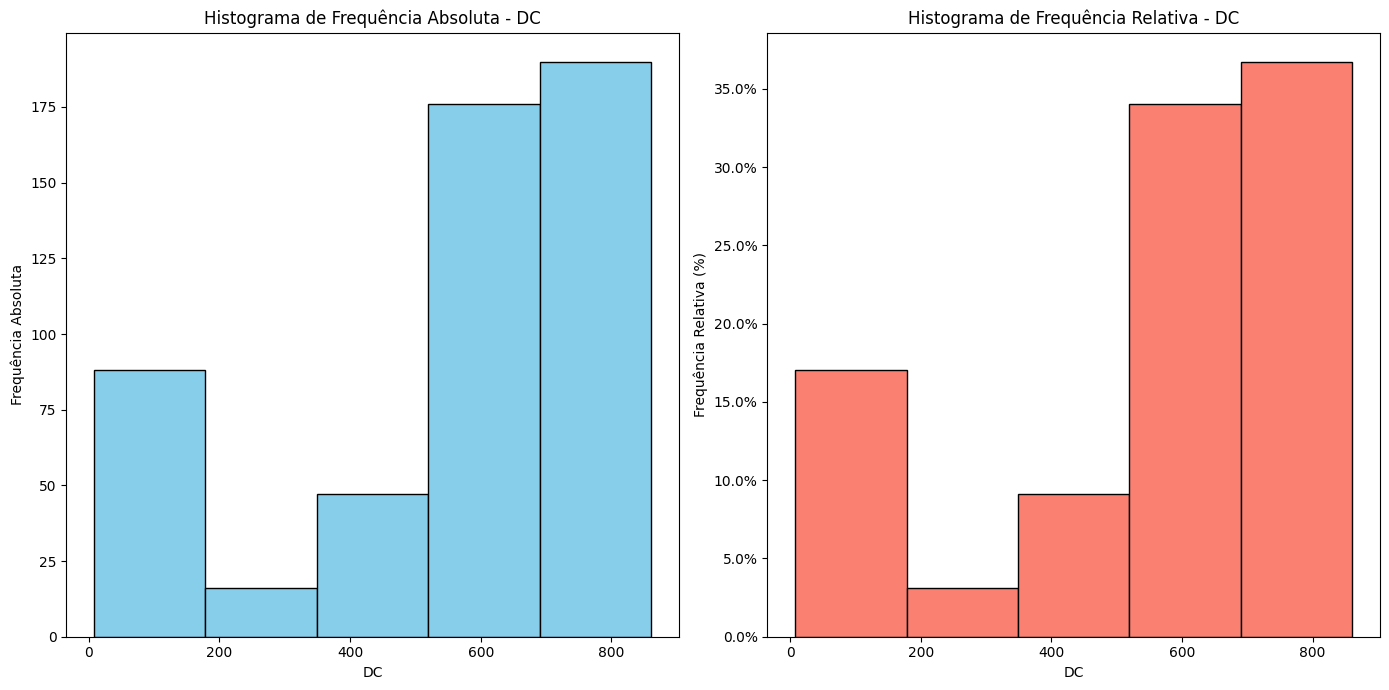

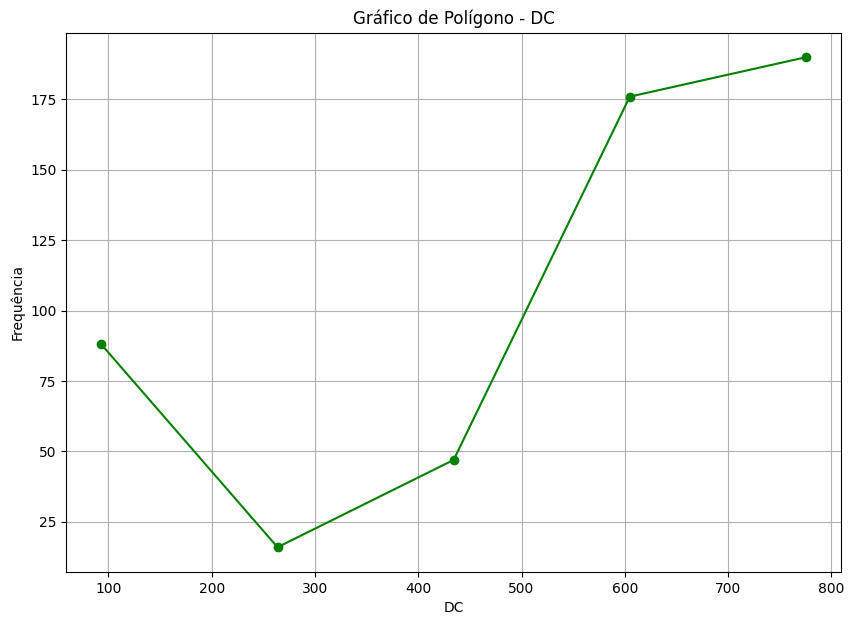

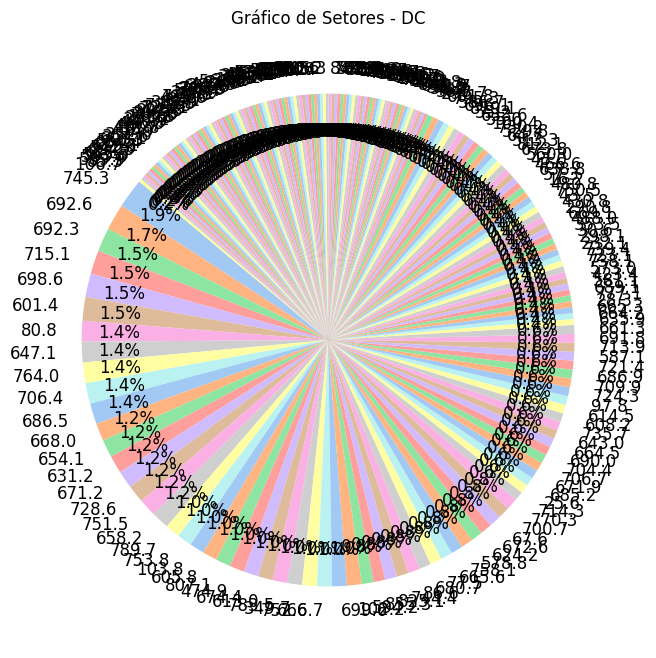

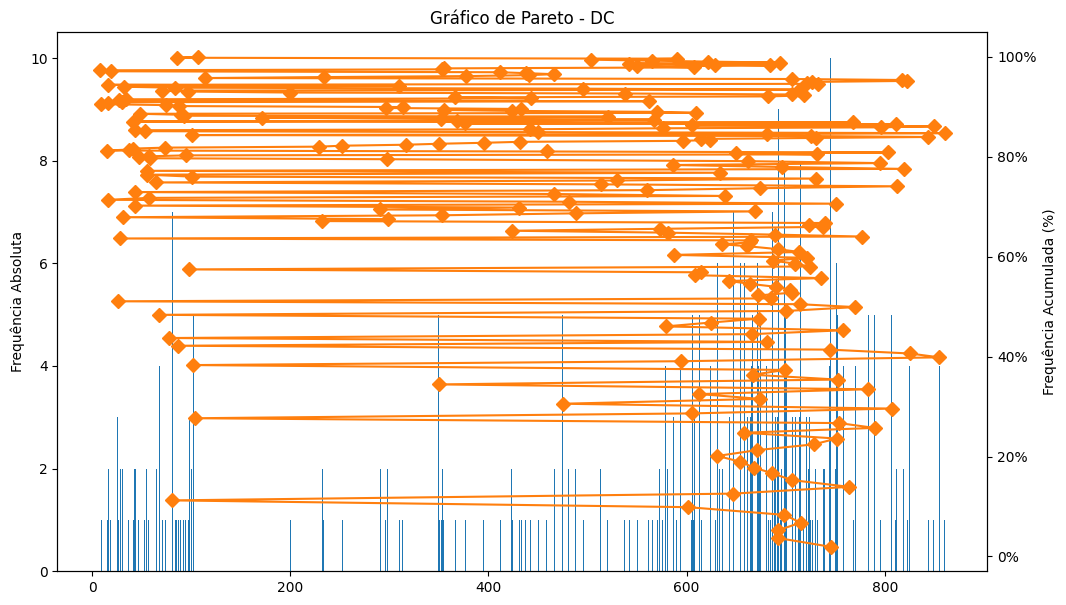

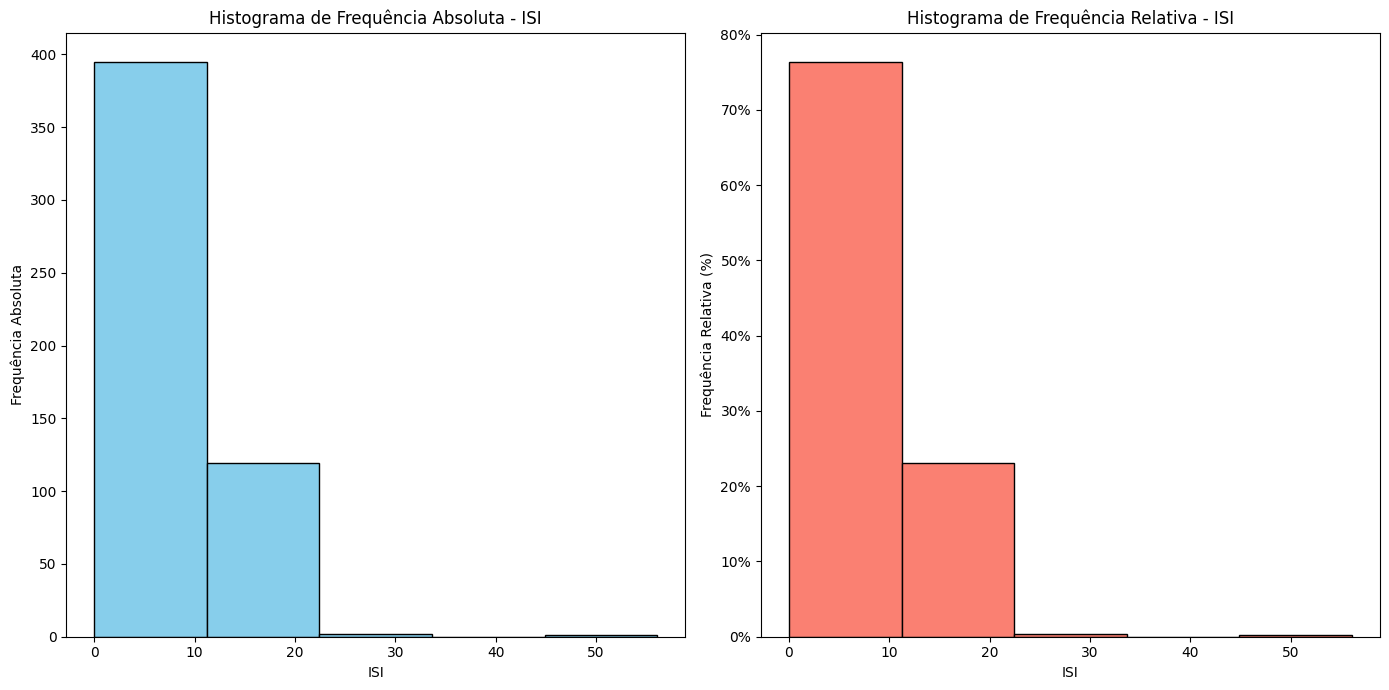

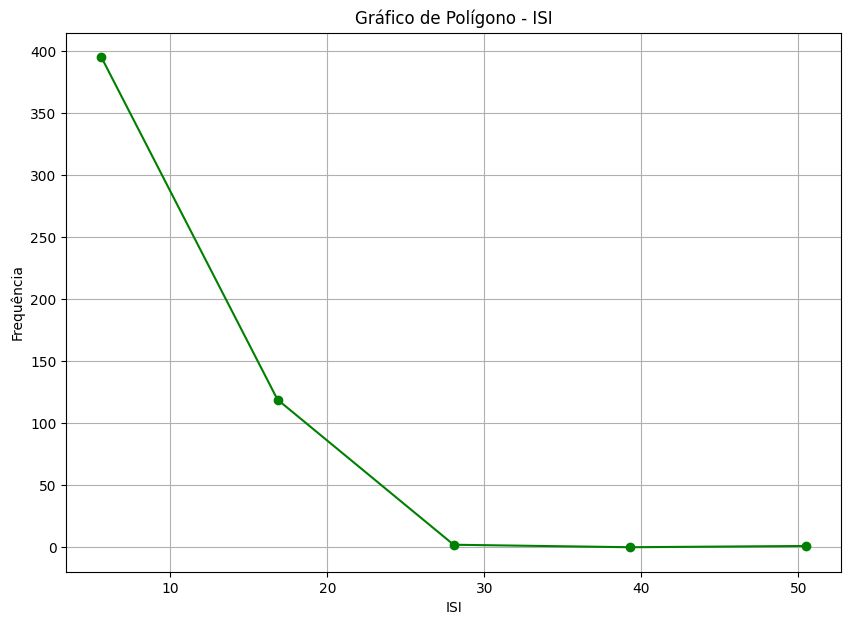

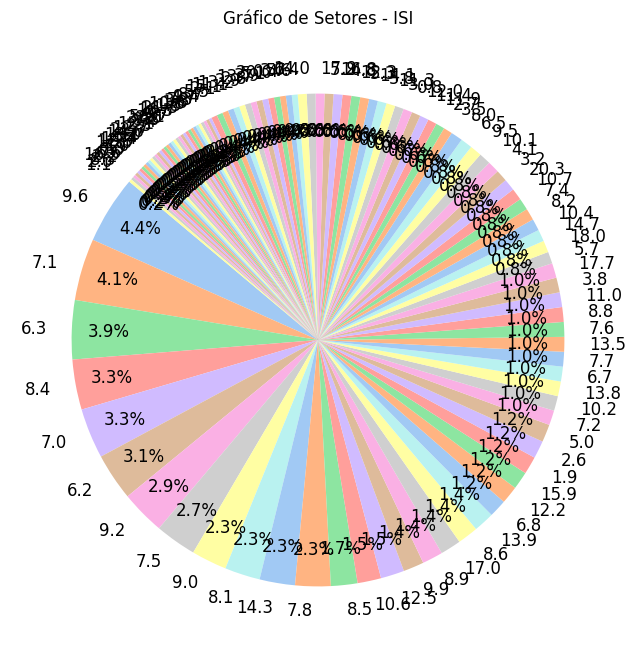

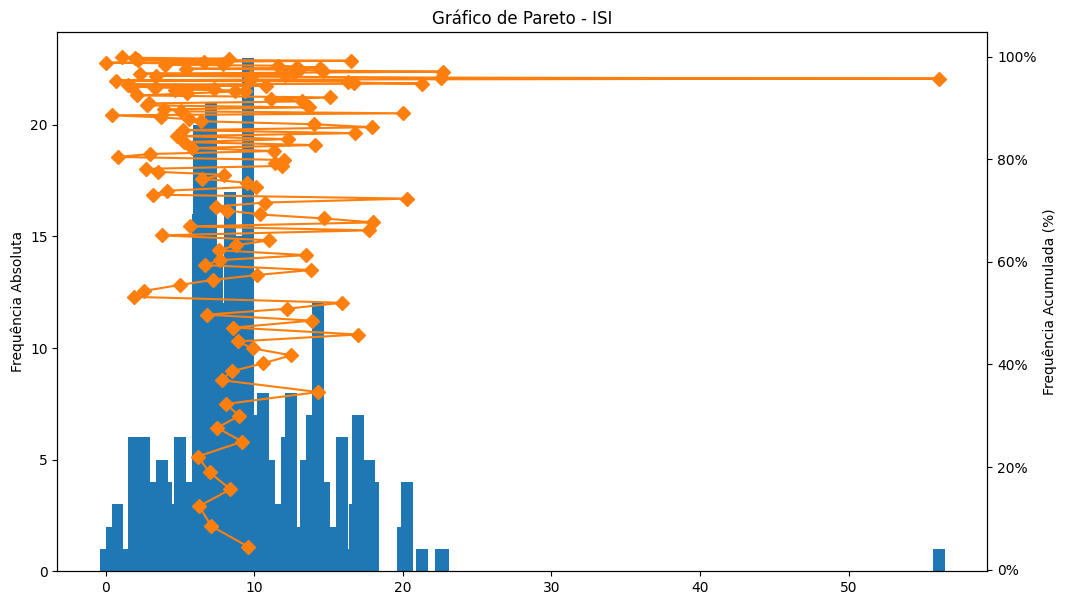

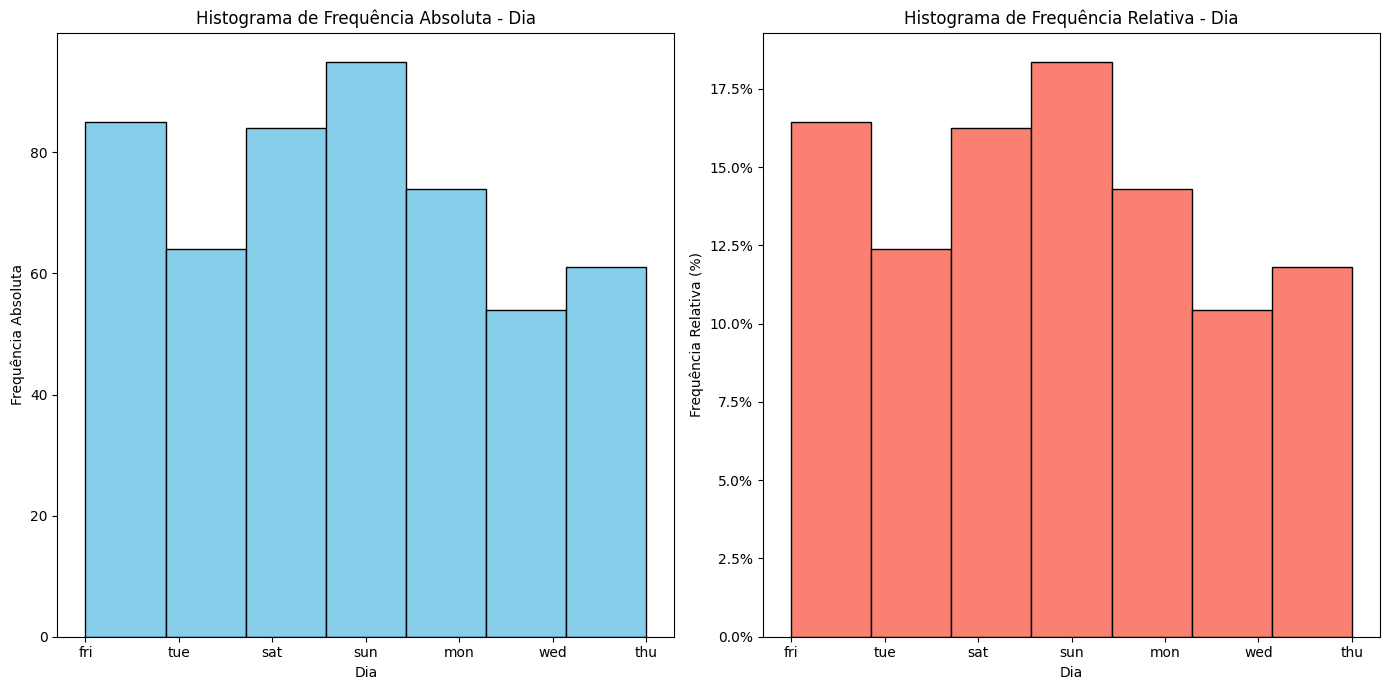

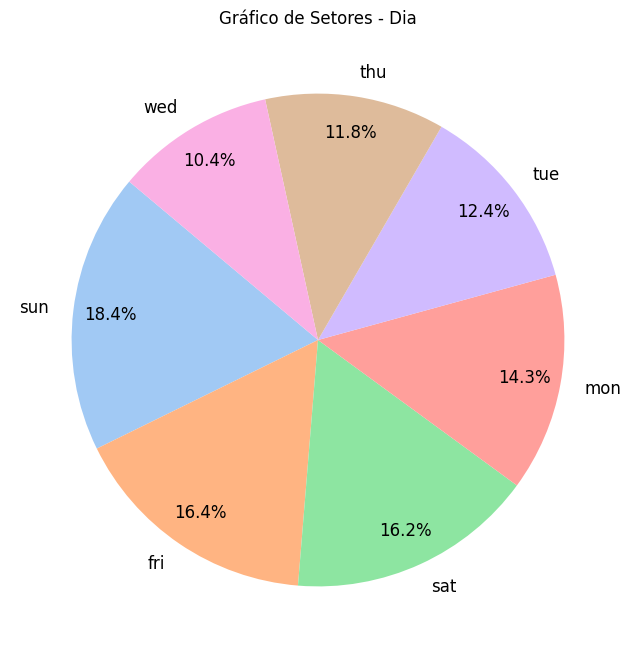

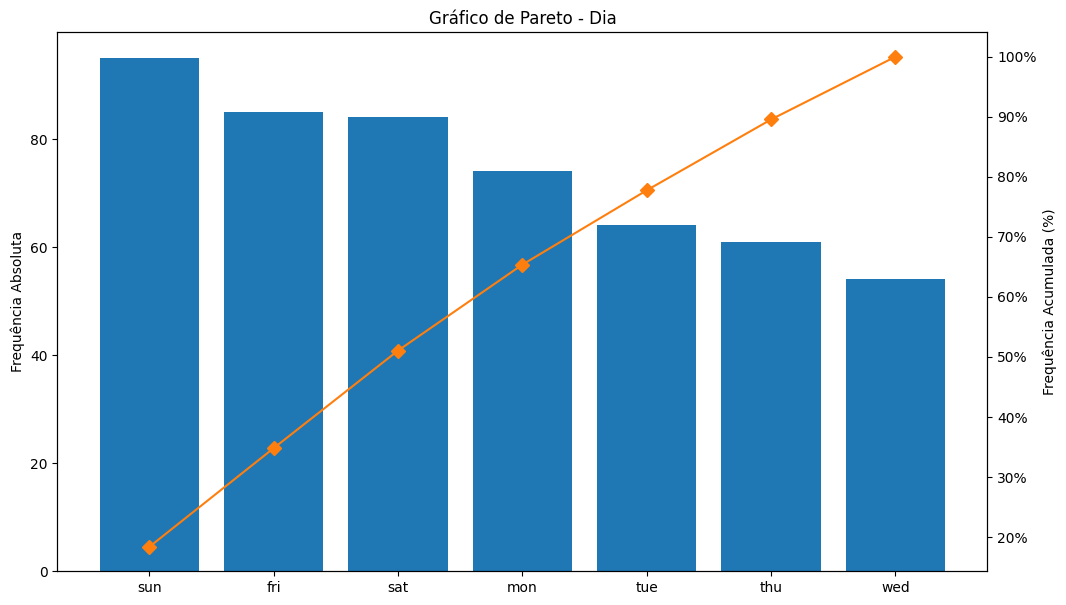

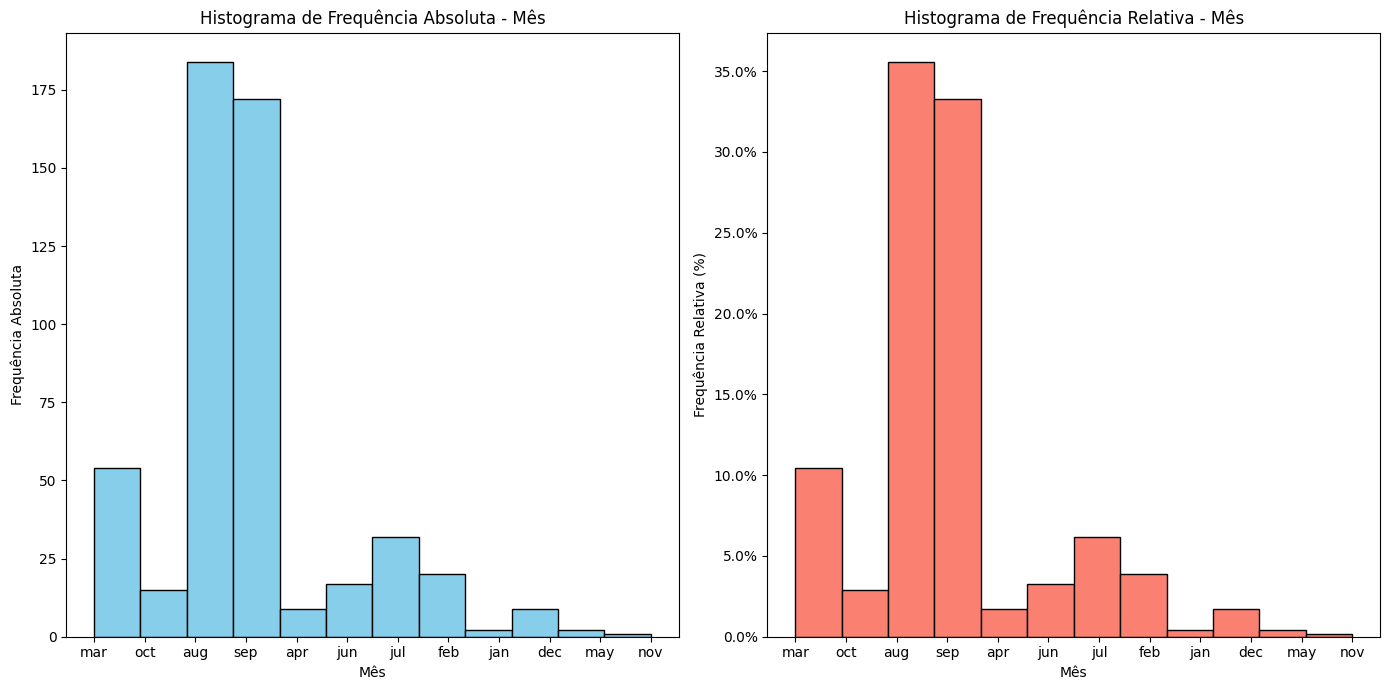

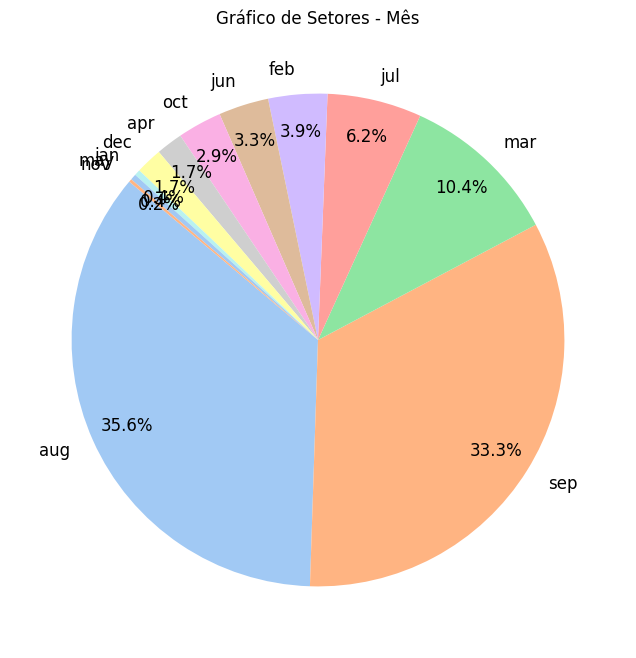

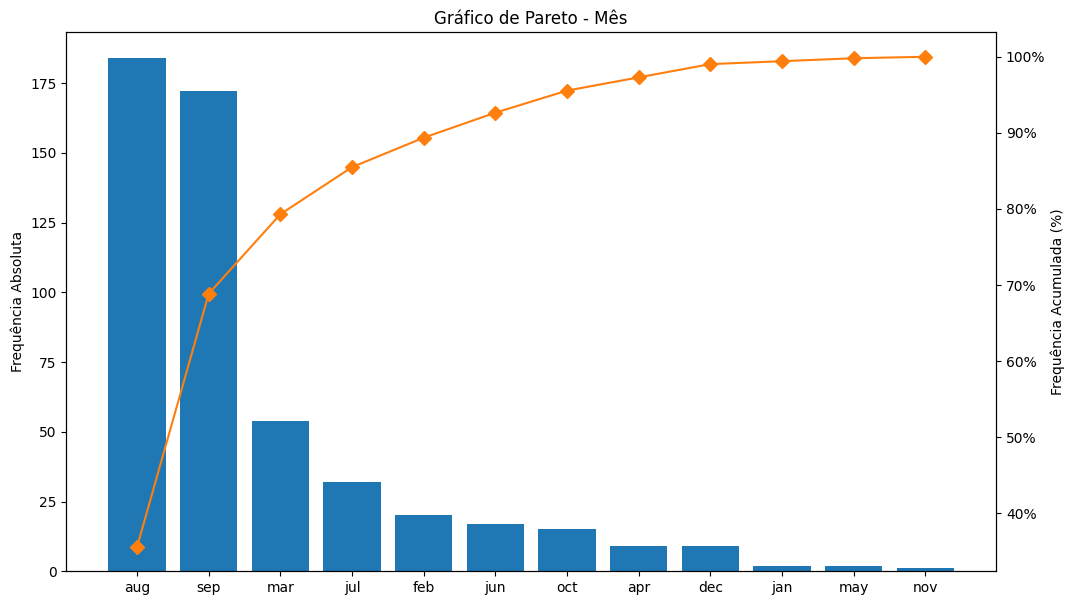

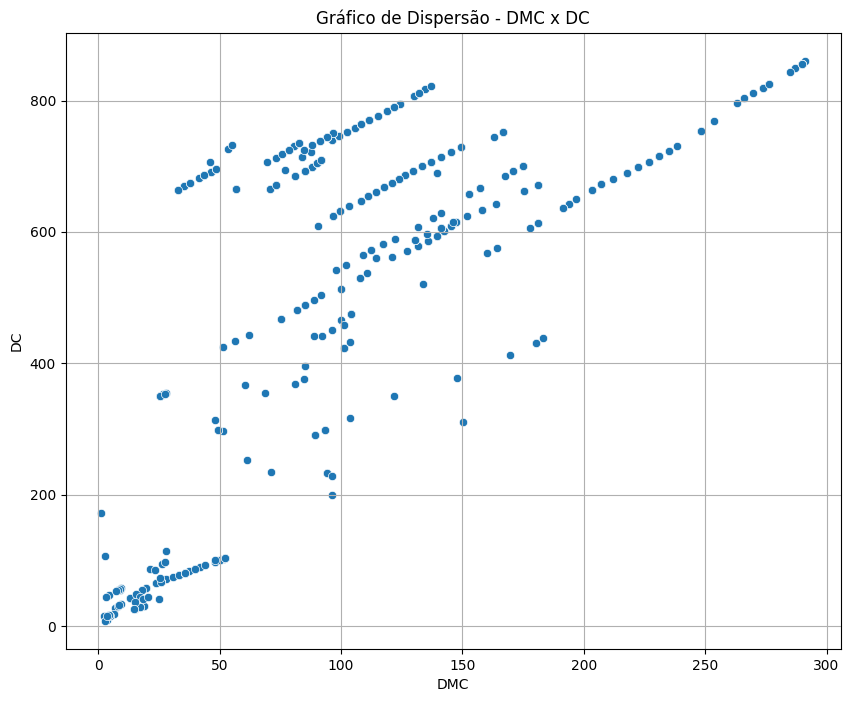

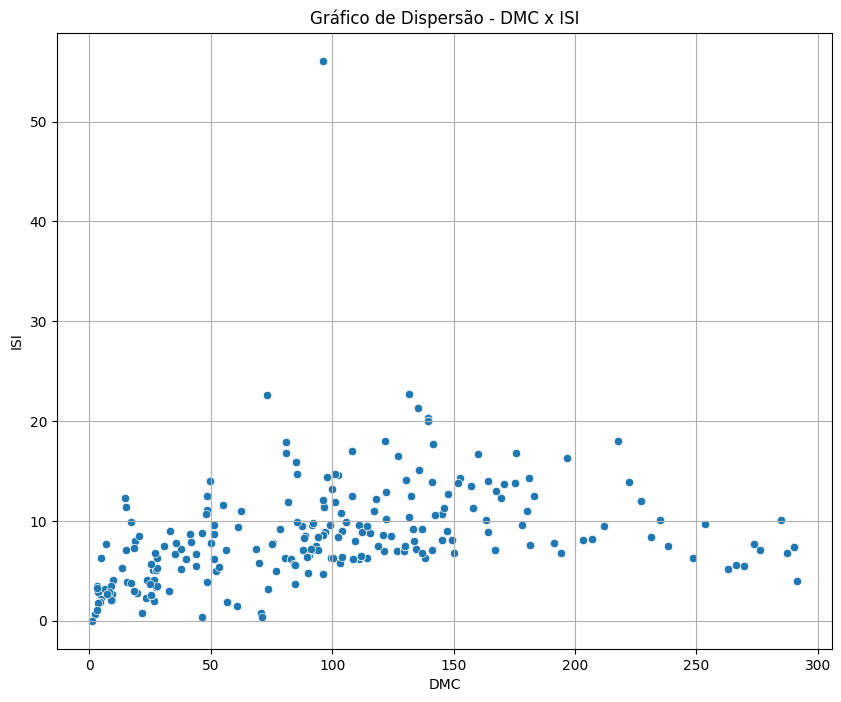

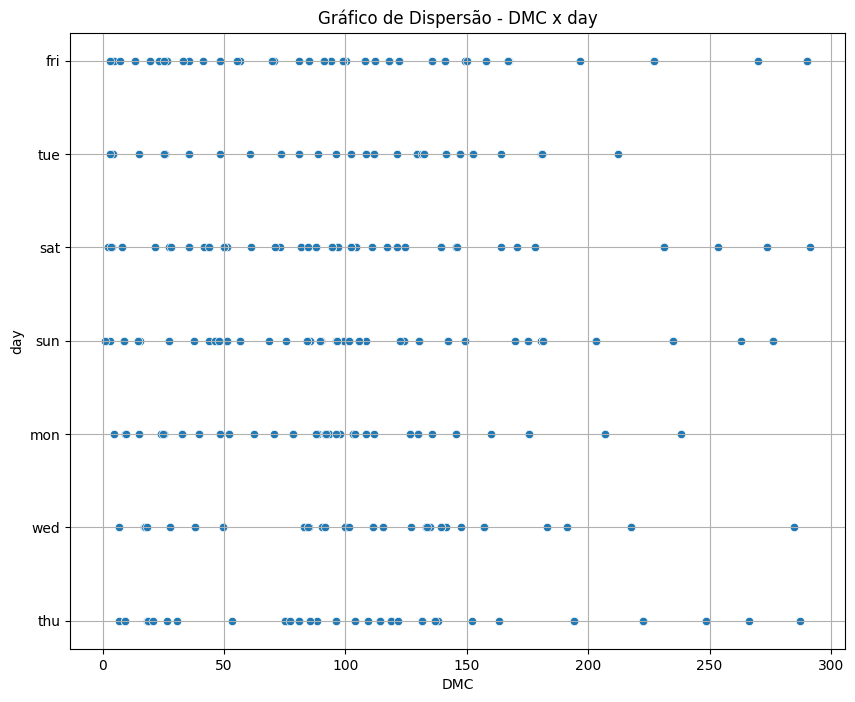

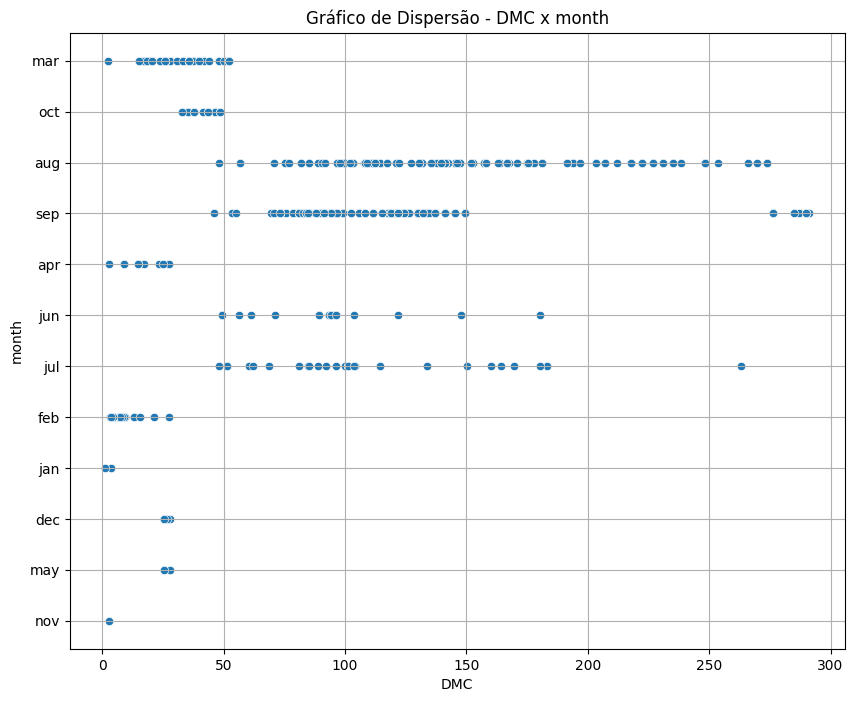

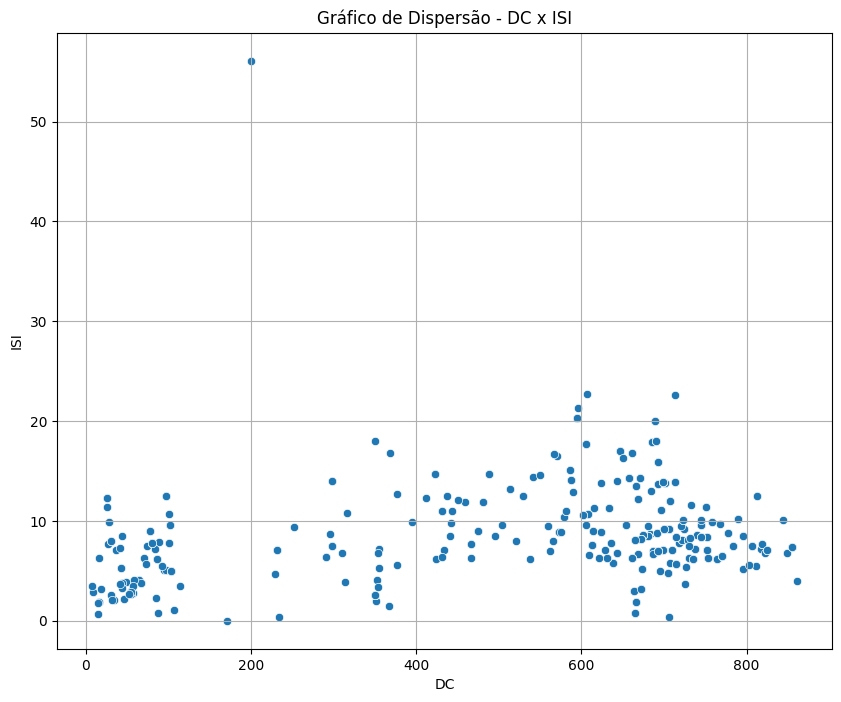

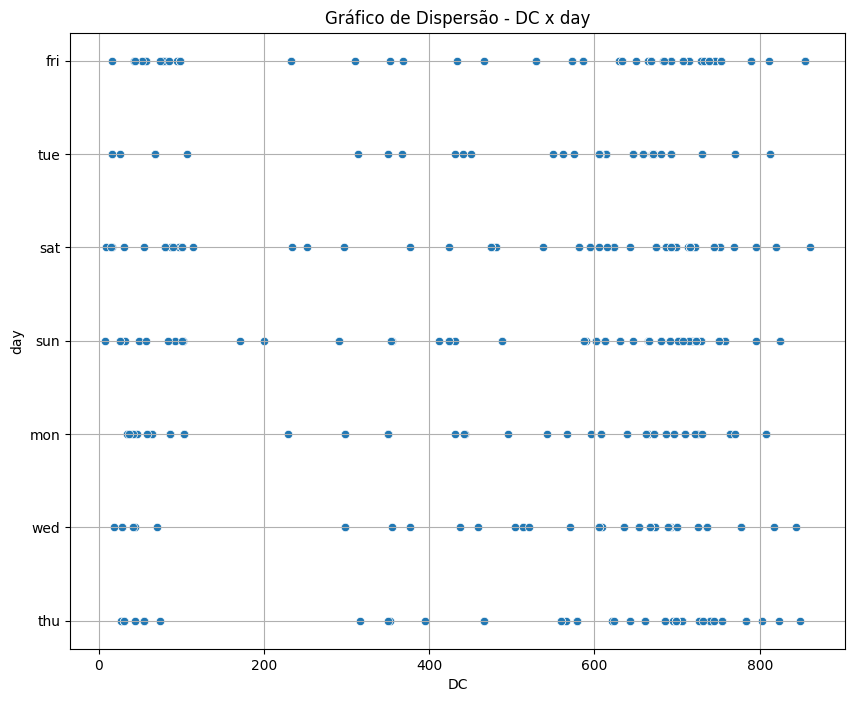

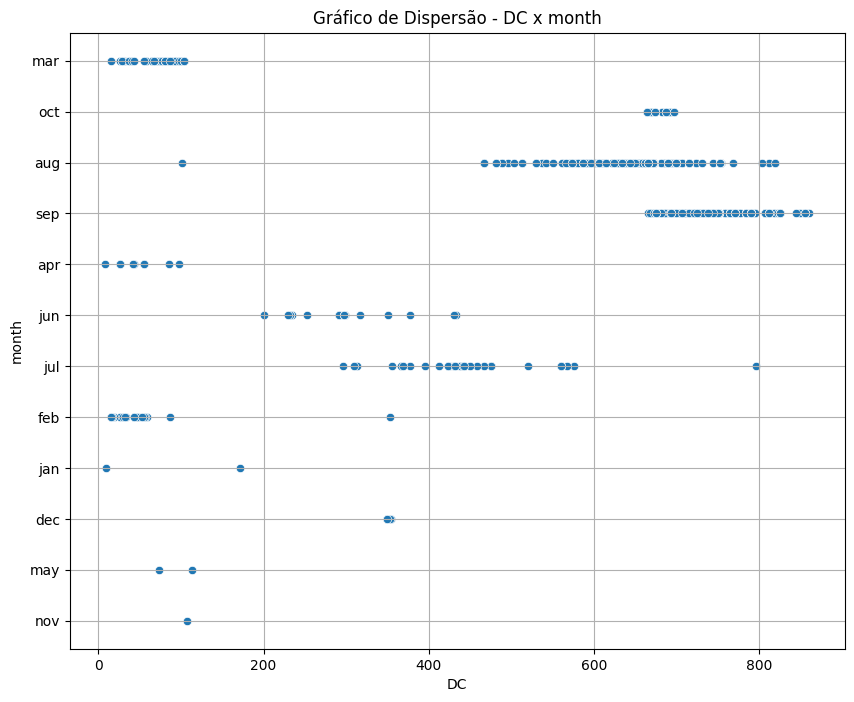

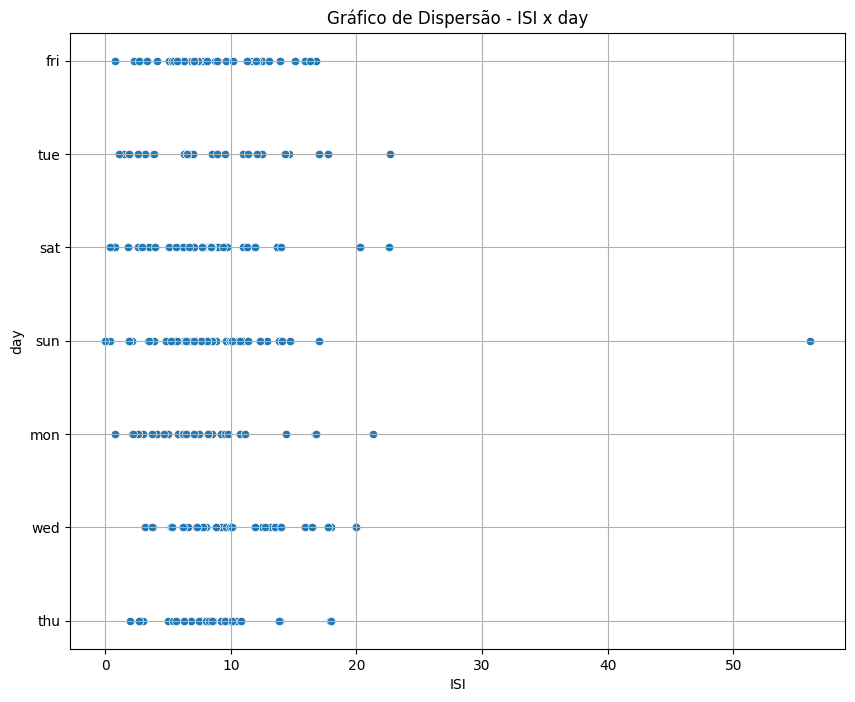

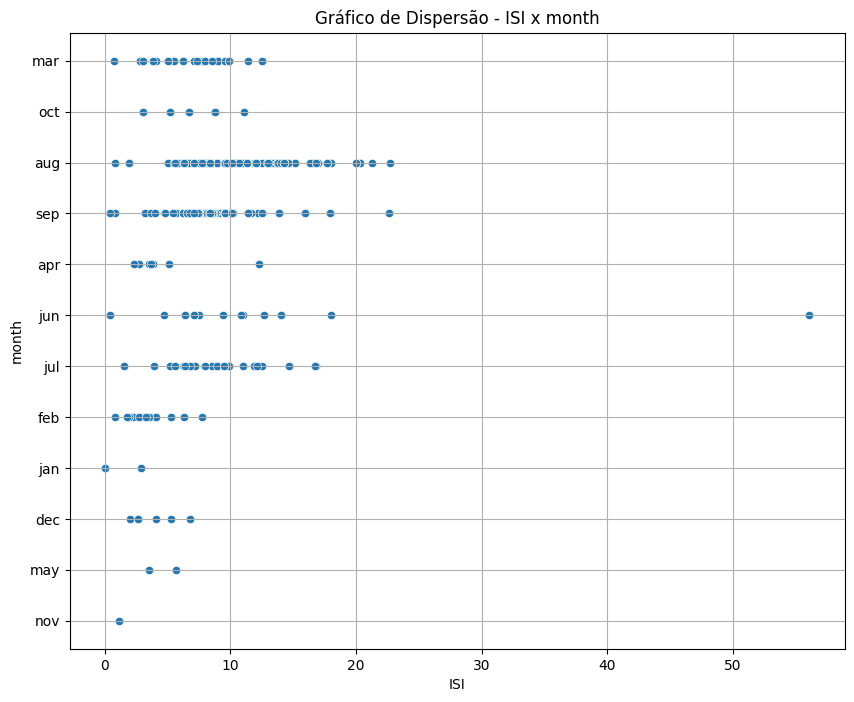

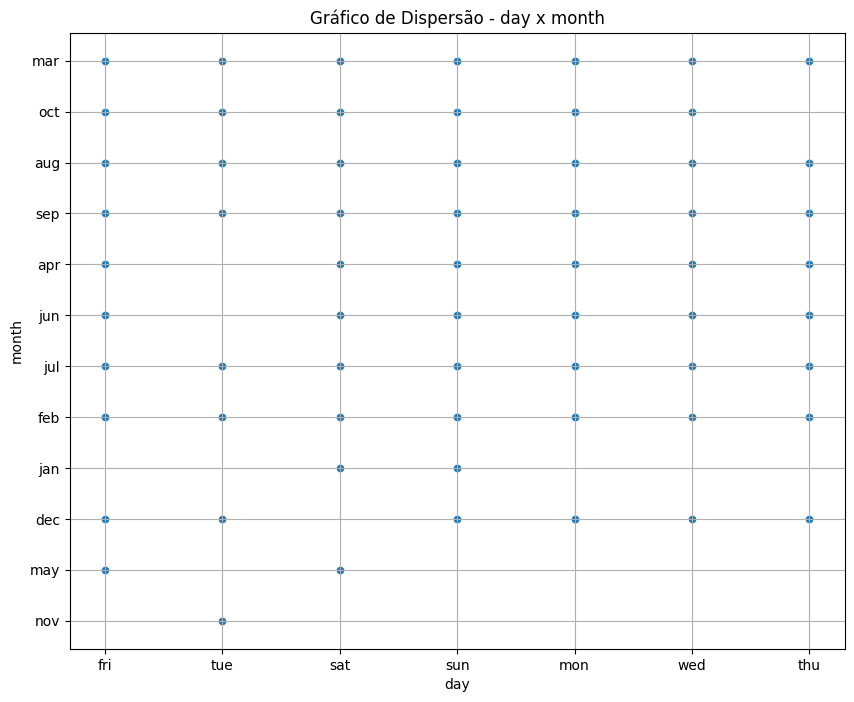

In [ ]:
# Exercício 2.

def plot_histograms(data, attribute, bins=5):
    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de Frequência Absoluta - {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequência Absoluta')

    plt.subplot(1, 2, 2)
    plt.hist(data, bins=bins, weights=np.ones(len(data)) / len(data), color='salmon', edgecolor='black')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.title(f'Histograma de Frequência Relativa - {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequência Relativa (%)')

    plt.tight_layout()
    plt.show()


def plot_polygon(data, attribute):
    counts, bins = np.histogram(data, bins=5)
    plt.figure(figsize=(10, 7))
    plt.plot(bins[:-1] + np.diff(bins) / 2, counts, marker='o', linestyle='-', color='green')
    plt.title(f'Gráfico de Polígono - {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


def plot_pie_chart(data, attribute):
    counts = data.value_counts()
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'),
        pctdistance=0.85
    )


    for text in texts:
        text.set_fontsize(12)
        text.set_color('black')
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('black')

    plt.title(f'Gráfico de Setores - {attribute}')
    plt.show()

def plot_pareto(data, attribute):
    counts = data.value_counts()
    cum_perc = counts.cumsum() / counts.sum() * 100
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.bar(counts.index, counts, color="C0")
    ax.set_ylabel("Frequência Absoluta")

    ax2 = ax.twinx()
    ax2.plot(counts.index, cum_perc, color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel("Frequência Acumulada (%)")

    plt.title(f'Gráfico de Pareto - {attribute}')
    plt.show()

def plot_scatter(df, attr1, attr2):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df[attr1], y=df[attr2])
    plt.title(f'Gráfico de Dispersão - {attr1} x {attr2}')
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    plt.grid(True)
    plt.show()

for attr in ['DMC', 'DC', 'ISI']:
    plot_histograms(df[attr], attr)
    plot_polygon(df[attr], attr)
    plot_pie_chart(df[attr], attr)
    plot_pareto(df[attr], attr)

plot_histograms(df['day'], 'Dia', bins=len(df['day'].unique()))
plot_pie_chart(df['day'], 'Dia')
plot_pareto(df['day'], 'Dia')

plot_histograms(df['month'], 'Mês', bins=len(df['month'].unique()))
plot_pie_chart(df['month'], 'Mês')
plot_pareto(df['month'], 'Mês')

attributes = ['DMC', 'DC', 'ISI', 'day', 'month']
for i in range(len(attributes)):
    for j in range(i + 1, len(attributes)):
        plot_scatter(df, attributes[i], attributes[j])


In [ ]:
# Exercício 3.

def calc_numeric_statistics(data):
    statistics = {
        'Média': data.mean(),
        'Moda': data.mode()[0] if not data.mode().empty else np.nan,
        'Mediana': data.median(),
        'Ponto Médio': (data.max() + data.min()) / 2,
        'Amplitude': data.max() - data.min(),
        'Desvio Padrão': data.std(),
        'Variância': data.var(),
        'Coeficiente de Variação (%)': (data.std() / data.mean()) * 100 if data.mean() != 0 else np.nan,
        'Assimetria': data.skew(),
        'Curtose': data.kurtosis()
    }

    return pd.Series(statistics)

def calc_categorical_statistics(data):
    statistics = {
        'Moda': data.mode()[0] if not data.mode().empty else np.nan,
        'Frequência Absoluta': data.value_counts().max(),
        'Assimetria': data.value_counts().skew(),
        'Curtose': data.value_counts().kurtosis()
    }

    return pd.Series(statistics)

attributes_numeric = ['DMC', 'DC', 'ISI']
statistics_numeric_df = pd.DataFrame({attr: calc_numeric_statistics(df[attr]) for attr in attributes_numeric})

attributes_categorical = ['day', 'month']
statistics_categorical_df = pd.DataFrame({attr: calc_categorical_statistics(df[attr]) for attr in attributes_categorical})

final_statistics_df = pd.concat([statistics_numeric_df, statistics_categorical_df], axis=1)

final_statistics_df = final_statistics_df.T

print("Tabela de Medidas de Tendência Central, Dispersão e Forma:\n")
print(final_statistics_df)

Tabela de Medidas de Tendência Central, Dispersão e Forma:

            Média   Moda Mediana Ponto Médio Amplitude Desvio Padrão  \
DMC     110.87234   99.0   108.3       146.2     290.2     64.046482   
DC     547.940039  745.3   664.2      434.25     852.7    248.066192   
ISI      9.021663    9.6     8.4       28.05      56.1      4.559477   
day           NaN    sun     NaN         NaN       NaN           NaN   
month         NaN    aug     NaN         NaN       NaN           NaN   

          Variância Coeficiente de Variação (%) Assimetria    Curtose  \
DMC     4101.951889                   57.765969   0.547498   0.204822   
DC     61536.835467                   45.272507  -1.100445  -0.245244   
ISI       20.788832                   50.539207   2.536325  21.458037   
day             NaN                         NaN   0.068188  -1.434507   
month           NaN                         NaN   1.842616   2.074322   

      Frequência Absoluta  
DMC                   NaN  
DC          

<Figure size 1500x1000 with 0 Axes>

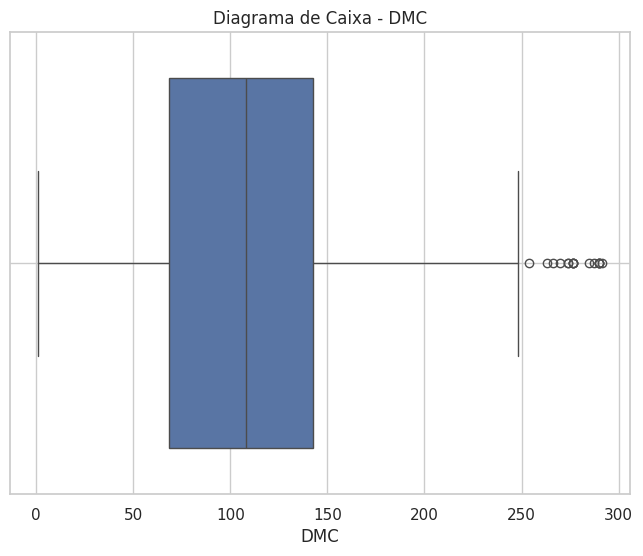

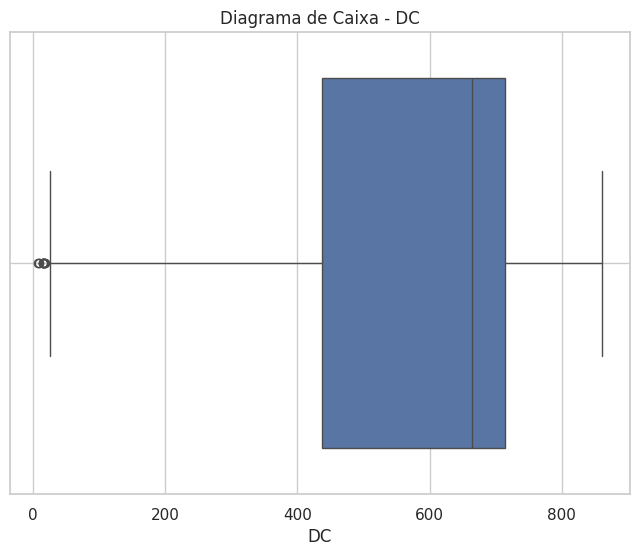

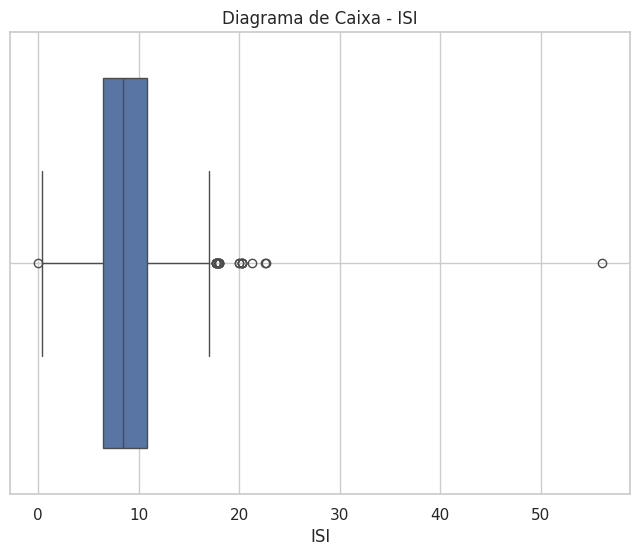

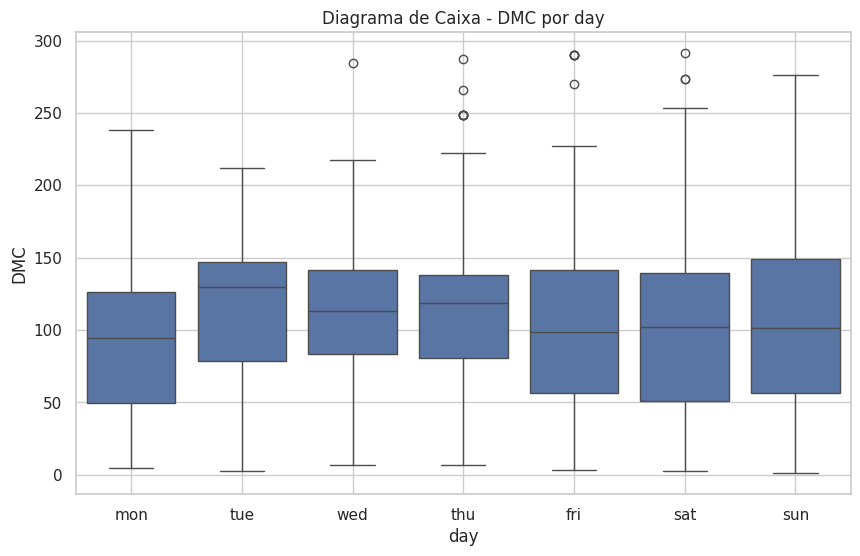

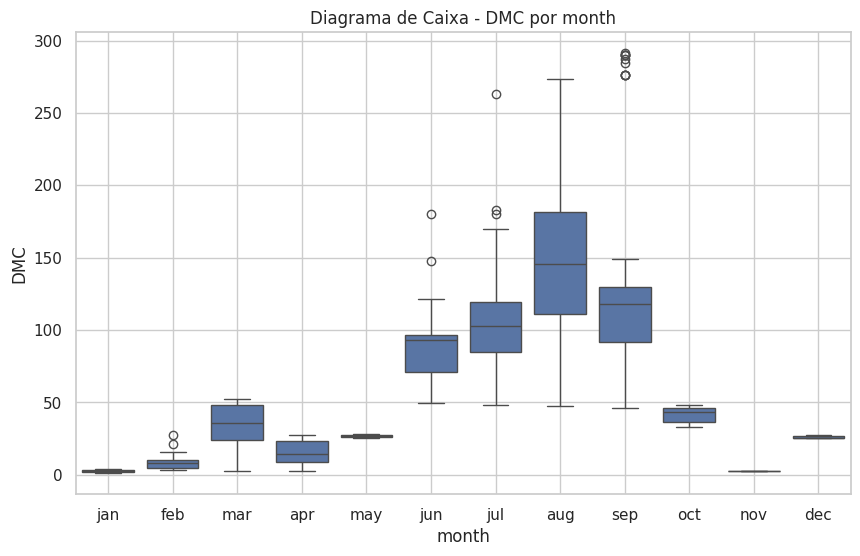

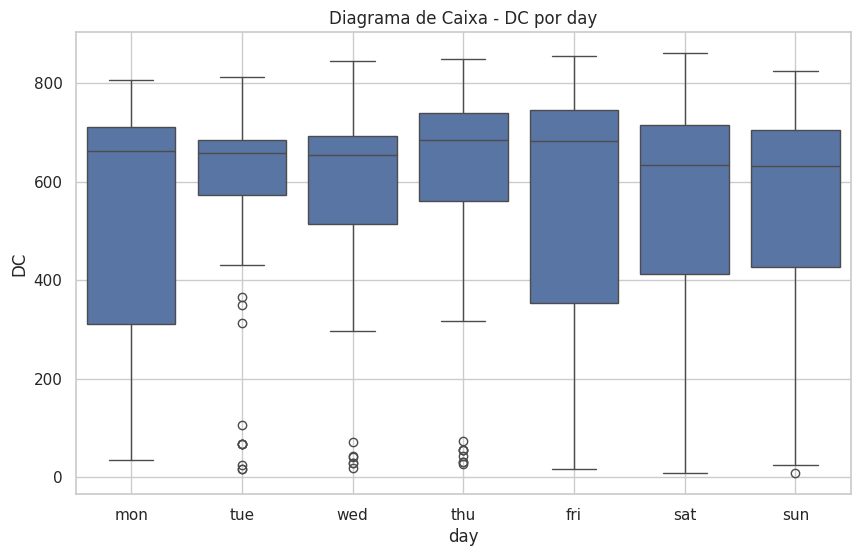

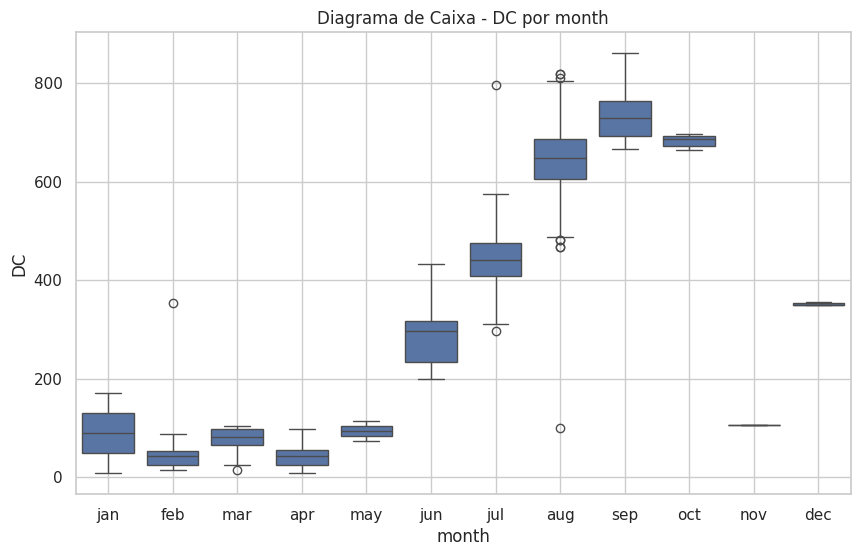

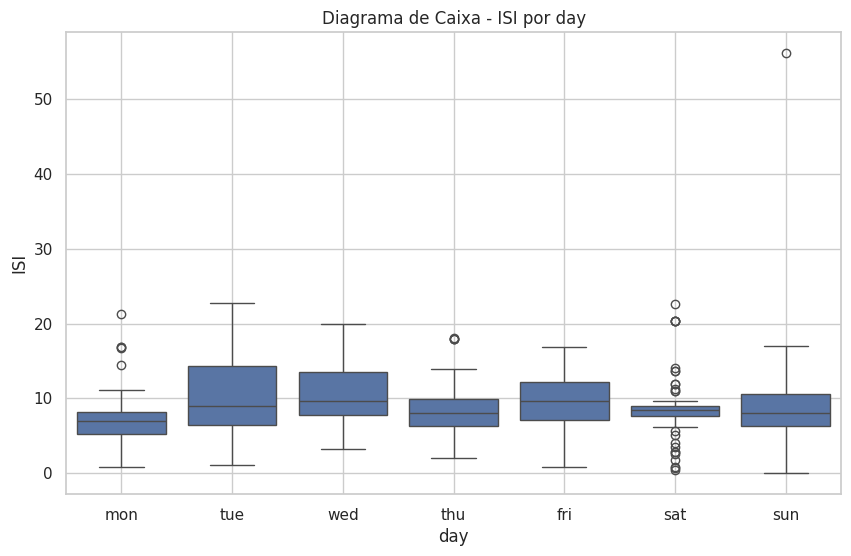

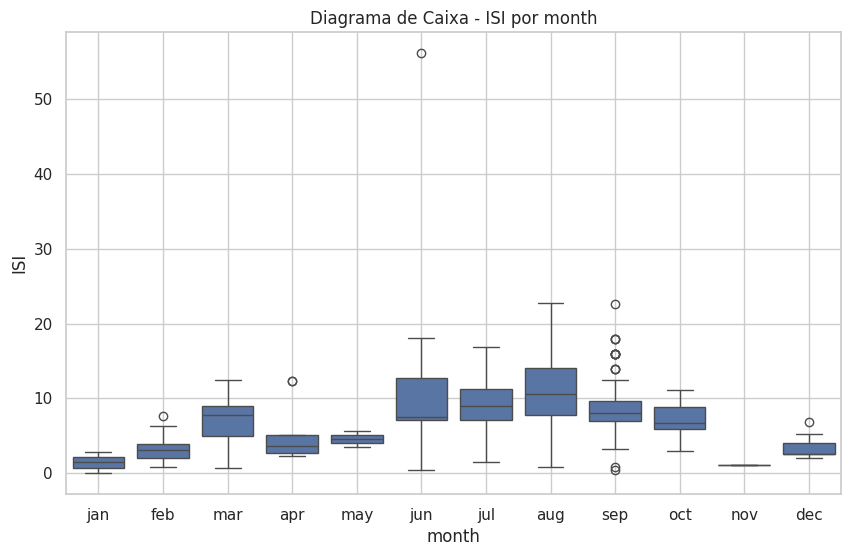

In [ ]:
# Exercício 4.

df['day'] = pd.Categorical(df['day'], categories=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], ordered=True)
df['month'] = pd.Categorical(df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

def plot_boxplot(data, attribute):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data)
    plt.title(f'Diagrama de Caixa - {attribute}')
    plt.xlabel(attribute)
    plt.grid(True)
    plt.show()

for attr in ['DMC', 'DC', 'ISI']:
    plot_boxplot(df[attr], attr)

def plot_boxplot_categorical(data, attribute):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=attribute, y=data, data=df)
    plt.title(f'Diagrama de Caixa - {data} por {attribute}')
    plt.xlabel(attribute)
    plt.ylabel(data)
    plt.grid(True)
    plt.show()

for numeric_attr in ['DMC', 'DC', 'ISI']:
    plot_boxplot_categorical(numeric_attr, 'day')
    plot_boxplot_categorical(numeric_attr, 'month')


<Figure size 1000x800 with 0 Axes>

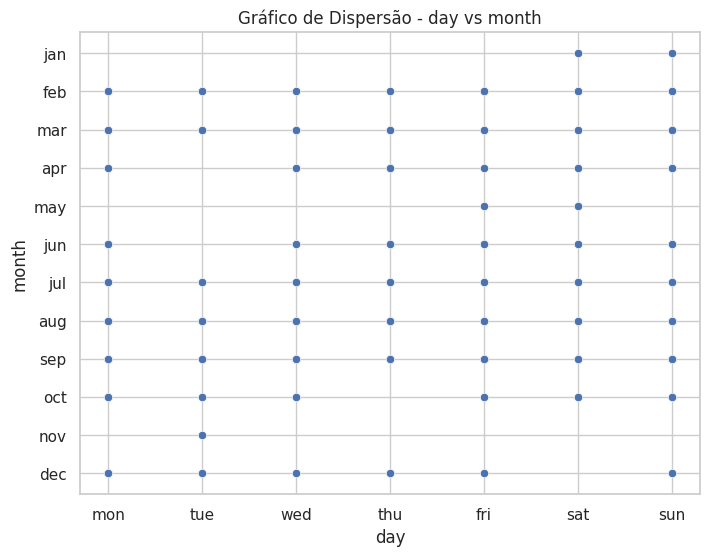

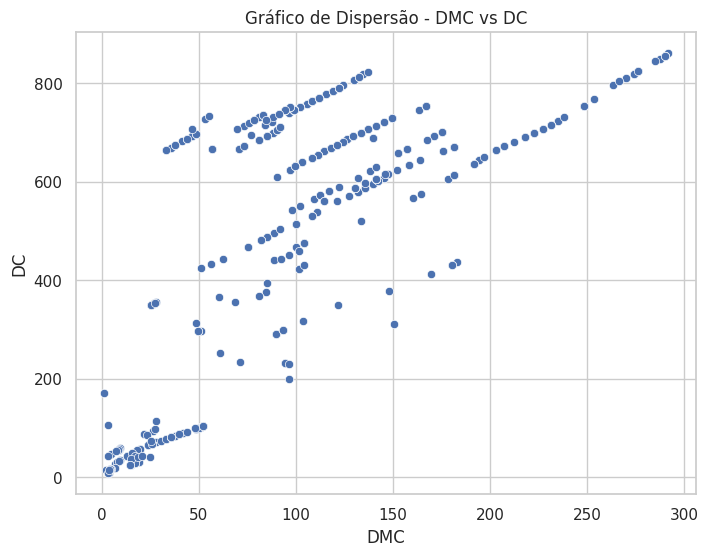

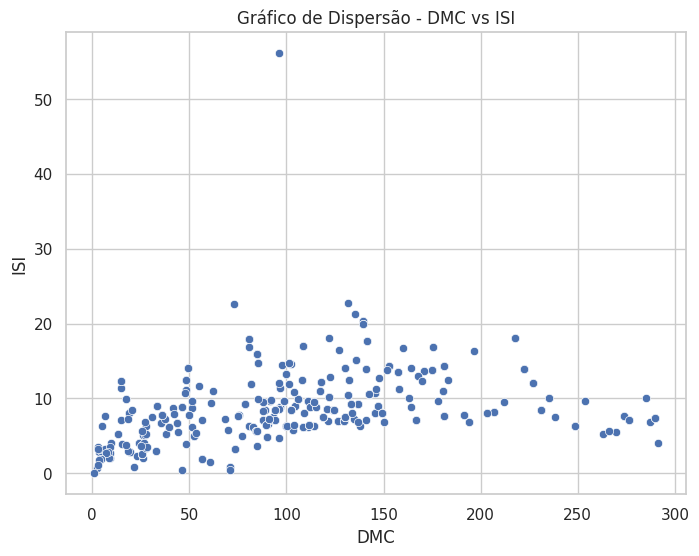

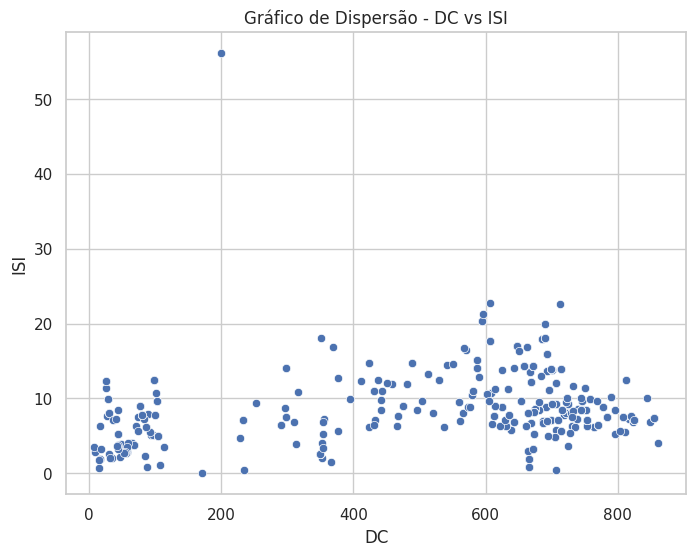

In [ ]:
# Exercício 5.

df['day'] = pd.Categorical(df['day'], categories=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], ordered=True)
df['month'] = pd.Categorical(df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

def plot_scatter(x, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'Gráfico de Dispersão - {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

plot_scatter('day', 'month')
plot_scatter('DMC', 'DC')
plot_scatter('DMC', 'ISI')
plot_scatter('DC', 'ISI')
